In [2]:
import pandas as pd
import torch
from torch import nn

device(type='cuda')

<Axes: >

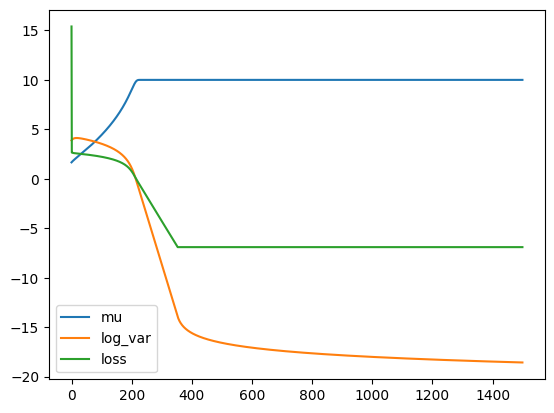

In [130]:
learning_rate = .2
loss = nn.GaussianNLLLoss()

input = torch.tensor([1.], requires_grad=True)
target = torch.tensor([10.])
log_var = torch.tensor([1.], requires_grad=True)
df = pd.DataFrame(columns=['mu', 'log_var', 'loss', 'mu_grad', 'log_var_grad'])

for i in range(1500):
    if input.grad is not None:
        input.grad.zero_()
    if log_var.grad is not None:
        log_var.grad.zero_()
    output = loss(input, target, torch.exp(log_var))
    output.backward()
    input.data -= learning_rate * input.grad
    log_var.data -= learning_rate * log_var.grad
    df.loc[i] = [input.item(), log_var.item(), output.item(), input.grad, log_var.grad]
df.plot()
# df